# Sklearn: Machine Learning
[Machine Learning](https://en.wikipedia.org/wiki/Machine_learning) is the study of computer algorithms that improve automatically through experience. Machine Learning algorithms build a [mathematical model](https://en.wikipedia.org/wiki/Mathematical_model) based on sample data in order to make predictions or decisions. In Data Analytics, Machine Learning is referred to as *predictive analysis* (supervised learning) and *data mining* (unsupervised learning). There are many libraries in Python designed for Machine Learning, but we'll start with the most basic one: [Scikit-learn](https://scikit-learn.org/stable/modules/classes.html).

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

:::{note}

Supervised Machine Learning refers to algorithms that learn a general *rule* from labeled data, then use that *rule* to predict labels for new, unlabeled data. The *rule* in this context can be understood as a function mapping input (features) to output (label). Supervised learning is all about predicting labels, containing:
- Classification
- Regression
- Forecasting
- Recommendation

Unsupervised Machine Learning does not require known labels, it finds hidden data patterns on their own. However, unsupervised learning is less popular and harder to evaluate the performance, compared to supervised learning. Here are some important applications of unsupervised learning:
- Clustering
- Dimensionality reduction
- Anomaly detection

:::

## 1. Terminology
This section focuses on concepts that occur in supervised Machine Learning.

### 1.1. Training
Training is the process of generating a particular model from an algorithm.

#### Algorithm and model
A supervised Machine Learning *algorithm* is an instruction to the computer to *learn* a *model*. A *model* can be summarized into a map $f$ that maps input variables $\mathbf{X}$ into the output variable $\mathbf{y}$:

$$f:\mathbf{X}\mapsto\mathbf{y}$$

In practice, two terms *algorithm* and *model* can be used interchangeably. A Machine Learning model $f$ can be either *parametric* or *non-parametric*.
- *Parametric models* assume the relationship between $\mathbf{X}$ and $\mathbf{y}$ can be described using a mathematical function with a finite number of parameters, the function form remains unchanged when the data size grows. Models of this type are very much like narrow-minded people: the function form is fixed, it makes them look at every problem the same way. Parametric models are fast, but they are unlikely to match the underlying rules in practice.
- *Non-parametric models*, in contrast, can use an infinite number of parameters to model data relationship. Due to the high complexity and flexibility, non-parametric models have more prediction power but are also slower when fitting to the data.

#### Model
A model is the output of a Machine Learning algorithm has run on the data. For example, the Linear Regression algorithm results in a model being a vector of parameters (also known as weights). Machine Learning uses mathematical techniques to estimate those parameters.

After the parameters have been calculated, the model is saved as a file and can be used on the data it hasn't seen before to make predictions.

#### Loss function
Loss function is a function that maps a model to its associated cost. In Machine Learning, loss functions usually evaluate the error; for example, the difference between real values and predicted values. Each algorithm tries to minimize its own loss function to estimate the parameters.

#### Optimization
In multivariate calculus, the gradient of a multivariable function $f(x,y,z,\dots)$, denoted $\nabla{f}$ is a vector that stores all partial derivatives.

$$\nabla{f} =
\begin{bmatrix}
\frac{\partial{f}}{\partial{x}} &
\frac{\partial{f}}{\partial{y}} &
\frac{\partial{f}}{\partial{z}} &
\cdots &
\end{bmatrix}^T$$

At every local minimum or local maximum of the function $f(x,y,z,\dots)$, the gradient $\nabla{f}$ is $\mathbf{0}$. By solving the linear system, we can find extreme points can be found and then compare them to find the minimum and maximum. The steps above show how to use gradient to find the minimum of a loss function and the associated values of parameters. However, for very large linear systems, solving them directly seems impossible.

Therefore, an iterative method called gradient descent is commonly used as the optimization algorithm in Machine Learning. The algorithm begins at a point (initial value), moves in the opposite direction of the gradient and stops when $\|\nabla{f}\|_2 \approx 0$.

Gradient descent has a parameter, $\eta$ - the learning rate, represents how fast the algorithm goes down. A high learning rate means fewer iterations to perform, but we risk bypassing the lowest point. A low learning rate makes sure we can always reach the bottom, but it can take a very long time.

### 1.2. Validating
Validating is the process of finding optimal hyperparameters. Also called hyperparameters tuning.

#### Hyperparameters
A hyperparameter is a configuration that is external to the model. Hyperparameters cannot be estimated since they need to be set before fitting the algorithm. They are optimized using rules of thumb or trial and error.

#### Metrics
Metrics are the formulas that evaluate the performance of Machine Learning models. The metrics are selected depend on the type of algorithm, which can be either regression, classification or clustering. Also notice that multiple metrics can be used on a single model; and the loss function can also be used as a metric.

#### Validation
The final purpose of a Machine Learning model is to work well on completely new data. To achieve this, we perform validation:
- Step 1: Randomly split the data into 3 sets: training set, validation set and test set. The ratio is usually 70:15:15 or 80:10:10.
- Step 2: Fit the algorithm on the training data. Then use the output model to predict label for the validation set and evaluate the performance.
- Step 3: Repeat step 2 with different values of hyperparameters to find the model with the best performance.
- Step 4: Apply the model to the test data and calculate metrics.

#### Cross validation
Considering validation, when the data is not large enough, the training set and the test set may not distribute the same way, which leads to bias. A technique called cross validation my be used to handle the situation.
- Step 1: Randomly divide the entire dataset into $k$ equal folds ($k$ is usually from 5 to 10).
- Step 2: Run a loop through each of the $k$ folds. In each iteration:
    - Take the selected fold as the test set and take the $k-1$ remaining folds to form the training set
    - Fit the algorithm on the training set and evaluate it on the test set
    - Retain the metric and discard the model
- Step 3: Fit the algorithm on the entire data to get the final model. Then calculate the average of the recorded scores as the overall performance metric for the model. The standard deviation of the scores should not be too high.

:::{image} ../image/cross_validation.png
:height: 300px
:align: center
:::

### 1.3. Testing

#### Goodness of fit
Generalization is the ability of a model to give sensible output when given the data is has never seen before. A model generalizes well if it is neither *underfitting* nor *overfitting*.

:::{image} ../image/goodness_of_fit.png
:height: 250px
:align: center
:::
<br>

*Overfitting* refers to the situation that the performance of a model is very good on the training set but drops significantly over the test set. This can be explained that the model has learned the noises and random fluctuations from the training data, which do not occur on new data. *Early stopping* and *regularization* are two popular techniques to reduce overfitting.

*Underfitting* can be recognized when the model performs poorly on both the test and the training set. The reason behind this is the model is not complex enough to capture patterns from the training data, so obviously there is no way it can work well on new data. The only thing that can be done to prevent underfitting is increasing the complexity of the model.

#### Data leakage
Data leakage refers to the situation when information from the outside training dataset is used to create the model. This causes the result of the model unreliable, and when such a model is used on truly unseen data, performance will be much lower than expected. There are some common causes of data leakage:
- *Preprocessing*: Make sure these transformations only have knowledge of the training set, even though they are applied to the test set as well. When using pre-processor, you must *fit* it to the training set instead of the entire dataset, and only use *transform* method on the testing data.
- *Duplicates*: The training and testing set can contain the same data point if the dataset has duplicate values, data cleaning must be used before applying the model. In some cases, duplicate values must be kept, be careful when splitting train-test.
- *Temporal data* (implicit data): Even when you are not explicitly leaking information, you may still experience data leakage if there are dependencies between the test and train set. This usually happens with time series data, for example, the training set contains $x_1$ and $x_3$ while the test set contains $x_2$. In this case, the model was trained on future knowledge, so its result will be unrealistic. In order to fix this problem, make sure that the test-train split is also split across time.

According to the causes of data leakage, there are some methods to prevent it.
- Using cross-validation, create validation set separately.
- Apply preprocessors to train and test sets separately
- Doing EDA carefully, such as dropping the features which have high correlation with the target and removing duplicated values.
- Choose the cutting point with time-series data to prevent unrealistic prediction

## 2. Evaluation
This section discusses evaluation metrics for supervised tasks, specifically classification and regression, and [their implementations](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) in Scikit-learn.

### 2.1. Classification metrics

In [24]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [57]:
df = pd.read_csv('../data/credit_scoring.csv')
df = df.fillna(0)
x = df.drop(columns='bad_customer').values
y = df.bad_customer.values

In [58]:
algo = DecisionTreeClassifier(max_depth=15)
model = algo.fit(x, y)

yTrue = y.copy()
yProb = model.predict_proba(x)[:, 1]
yPred = model.predict(x)

#### Confusion matrix
[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) is a visualization for the performance of classification algorithms. Each column represents the number of observations in an actual class and each row represents the number of observations in a predicted class.

:::{image} ../image/confusion_matrix_binary.png
:height: 250px
:align: center
:::
<br>

However, in real-world problems, sometimes a class is more important than the others. From the perspective of that class (orange, for example), an observation may have the following statuses:
- Positive if the predicted class is orange, Negative if the predicted class is not orange
- True if the predicted class is correct, False if the predicted class is incorrect

The combination of the statuses above are: TP (True Positive), TN (True Negative), FP (False Positive) and FN (False Negative), which are used to calculate metrics for classification algorithms. These terms are arranged in a single table:

:::{image} ../image/confusion_matrix_multiclass.png
:height: 300px
:align: center
:::
<br>

In [11]:
confusion_matrix(yTrue, yPred)

array([[139452,    522],
       [  5664,   4362]])

In [12]:
((tn, fp), (fn, tp)) = confusion_matrix(yTrue, yPred)

#### Accuracy
Accuracy treats all the classes equally, since it calculates the True rate, which is the number of correct predictions over the total of predictions made. Accuracy is the default classification metric used in Scikit-learn.

$$\mathrm{Accuracy} = \frac{\mathrm{T}}{\mathrm{T}+\mathrm{F}}$$

Accuracy is a good measure when the classes are (nearly) balanced; however, it should never be used when the majority of the data falls into a single class. For example, there are 5 people have cancer out of 100 observations, and a predictive model classifies all 100 people have no cancer. So even it is very terrible at predicting cancer, such a bad model still has an Accuracy of 95%.

In [59]:
accuracy_score(yTrue, yPred)

0.9588466666666666

In [60]:
# accuracy is also the default metric
model.score(x, y)

0.9588466666666666

#### Precision
The Precision of a class shares the same meaning with Accuracy, but it considers only Positive predictions. It is calculated as the proportion of those Positive predictions are actually Positive.

$$\mathrm{Precision} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FP}}$$

Precision should be used when you want to make classification for one class as good as possible. For example, a video recommendation system classifies Positive for relevant videos and Negative for non-relevant ones. The recommended videos should be relevant to the users, so the system should have a high Precision.

In [18]:
precision_score(yTrue, yPred, pos_label=1)

0.8912202077816256

#### Recall
The per-class Recall, also known as Sensitivity, measures the proportion of actual Positive observations that are correctly classified.

$$\mathrm{Recall} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}$$

If you don't want to mispredict any real Positive case, then you need Recall. For example, a COVID-19 test kit must detect as many infected people (Positive) as possible, so it should have a high Recall.

In [19]:
recall_score(yTrue, yPred, pos_label=1)

0.43636544983044084

#### F-score
Machine Learning is full of trade-offs, oftentimes your classifier does not have good Precision and good Recall at the same time. A single metric that summarizes both is needed, and that's where F-score is used.

$$
F_1 = \left(\frac{1}{2}\cdot\mathrm{Precision}^{-1}+\frac{1}{2}\cdot\mathrm{Recall}^{-1}\right)^{-1}
$$

To compute $F_1$ score, the harmonic mean is used instead of the usual arithmetic mean since this method gives a higher weight to the lower quantity of the two. For example, a classifier has a Precision of 10% and a Recall of 90%, then their harmonic mean is 18% while their arithmetic mean is 50%. So, a high $F_1$ score ensures that the Precision and Recall are both high.

However, there is a disadvantage of $F_1$ score is that it treats both Precision and Recall equally. Sometimes it is required to include domain knowledge in the model, specifically more Recall or more Precision. To solve this, we add a weight to Recall, denoted $\beta$, to control the trade-off between Precision and Recall. $\beta$ implies how many times is Recall more important than Precision.

$$
F_{\beta} = \left(\frac{1}{1+\beta^2}\cdot\mathrm{Precision}^{-1} + \frac{\beta^2}{1+\beta^2}\cdot\mathrm{Recall}^{-1}\right)^{-1}
$$

In [23]:
fbeta_score(yTrue, yPred, beta=1/2, pos_label=1)

0.7374755579529363

#### AUROC
AUROC stands for Area Under the ROC curve, the name shows how it is calculated. The value of AUROC is in the range $[0,1]$, where higher value means better ability in distinguishing the two classes. AUROC is a well-rounded metric and is widely used in real world classification problems.

In [62]:
roc_auc_score(yTrue, yProb)

0.9201729303801544

#### Multi-class metrics
Notice that except for Accuracy, all the above metrics are defined for binary classification. In multi-class problems, they can only measure the performance of a class versus the rest. Here is how the overall metric of the model is calculated, let's take Precision as an example:
- Micro Precision, by taking the average TP and FP for each class, then applying the same per-class formula.

$$\mathrm{MicroPrecision}=\frac{\sum{\mathrm{TP}_c}}{\sum{\mathrm{TP}_c}+\sum{\mathrm{FP}_c}}$$

- Macro Precision, by taking the arithmetic mean of Precision of all classes ($C$ is the number of classes).

$$\mathrm{MacroPrecision}=\frac{1}{C}\sum{\mathrm{Precision}_c}$$

- Weighted Precision, by taking the weighted sum of Precision of all classes. The weight $w_c$ is defined as the proportion of each class.

$$\mathrm{WeightedPrecision}=\sum{w_c\cdot\mathrm{Precision}_c}$$

The Scikit-learn library provides the `classification_report` function that calculates both per-class metrics and overall metrics.

In [47]:
report = classification_report(yTrue, yPred)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    139974
           1       0.89      0.44      0.59     10026

    accuracy                           0.96    150000
   macro avg       0.93      0.72      0.78    150000
weighted avg       0.96      0.96      0.95    150000



#### Customized metrics
The default metric used in Scikit-learn is Accuracy, however you can use another metric, or even a [customized one](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules) using the `scoring` parameter. It takes a string as input, where available options can be found in the reference. For a complex metric, the function requires to define it first.

In [12]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.neighbors import KNeighborsClassifier

In [13]:
clf = KNeighborsClassifier()
params_grid = {'n_neighbors': [3, 4, 5]}
metric = make_scorer(fbeta_score, beta=4)

In [14]:
cv = GridSearchCV(clf, params_grid, scoring='precision')
cv = GridSearchCV(clf, params_grid, scoring=metric)

### 2.2. Classification visualization
This section visualizes the performance of binary classification problems.

In [1]:
import numpy as np
import pandas as pd

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('../data/credit_scoring.csv')
df = df.fillna(0)
x = df.drop(columns='bad_customer').values
y = df.bad_customer.values

In [3]:
algo = XGBClassifier()
model = algo.fit(x, y)

yTrue = y.copy()
yProb = model.predict_proba(x)[:, 1]
yPred = model.predict(x)

In [4]:
yTrue.shape

(150000,)

In [5]:
yProb.shape

(150000,)

#### Precision-Recall chart
PR Chart plots the values of Precision and Recall at different thresholds. Looking at this graph allows Data Scientists to understand deeply about the trade-off between Precision and Recall and can select an optimal threshold.

In [4]:
def plotPRChart(yTrue, yProb, beta=1, ax=None):
    from sklearn.metrics import precision_recall_curve
    precision, recall, threshold = precision_recall_curve(yTrue, yProb)
    precision = precision[:-1]
    recall = recall[:-1]
    if beta is not None:
        fbeta = 1 / (1/(1+beta**2)/precision + beta**2/(1+beta**2)/recall)

    if ax is None:
        ax = plt.gca()
    ax.plot(threshold, precision, label='Precision')
    ax.plot(threshold, recall, label='Recall')
    ax.plot(threshold, fbeta, ls='--', label='F-beta')
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Score')
    ax.legend()
    ax.axis('scaled')
    return ax

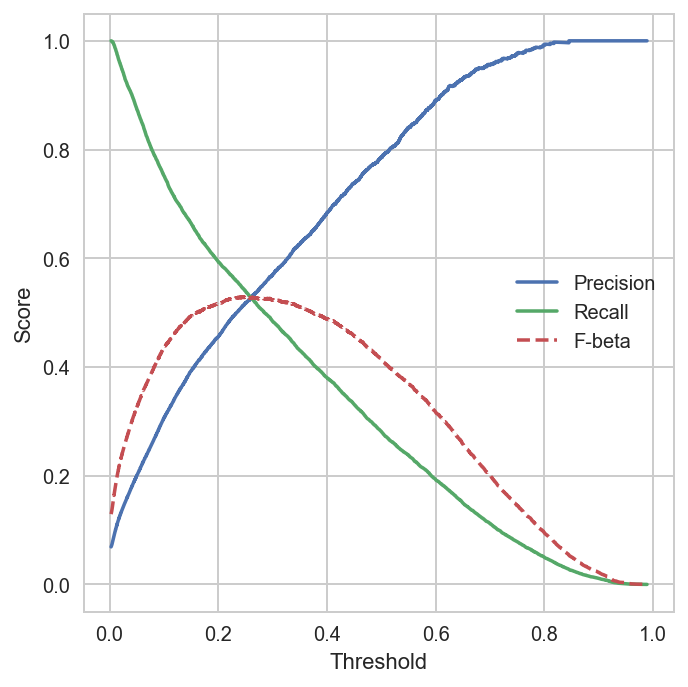

In [5]:
plotPRChart(yTrue, yProb, beta=1)
plt.show()

#### ROC curve
The [Receiver Operating Characteristics](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) (ROC) curve is plotted with TPR (True Positive Rate) against FPR (False Positive Rate) at different decision thresholds. It gives an overview about how well the model distinguishes between the two classes.

$$\mathrm{TPR}=\mathrm{Recall}=\mathrm{Sensitivity} = 
\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}$$

$$\mathrm{FPR}=1-\mathrm{Specificity} = 
\frac{\mathrm{FP}}{\mathrm{TN}+\mathrm{FP}}$$

In real world problems, there is always a trade-off between high Sensitivity and high Specificity. By looking at the ROC curve, there are many insights that can be read from it:
- Comparing the quality of different models. The more convex the curve is, the more predictive power it has.
- Determining the optimal threshold.
- Calculating the AUROC (Area Under the ROC), which is a single value that summarizes the overall performance of the model.

In [27]:
def plotROC(yTrue, yProb, ax=None):
    from sklearn.metrics import roc_curve, roc_auc_score
    auc = roc_auc_score(yTrue, yProb)
    fpr, tpr, _ = roc_curve(yTrue, yProb)
    sensitivity = tpr
    specificity = 1 - fpr
    
    if ax is None:
        ax = plt.gca()
    ax.plot([1, 0], [0, 1], color='k', linestyle='--')
    ax.plot(specificity, sensitivity)
    ax.set_xlabel('Specificity')
    ax.set_ylabel('Sensitivity')
    ax.axis('scaled')
    ax.text(0.02, 0.02, f'AUC = {auc:.4f}', va='bottom', ha='left', size=12)
    return ax

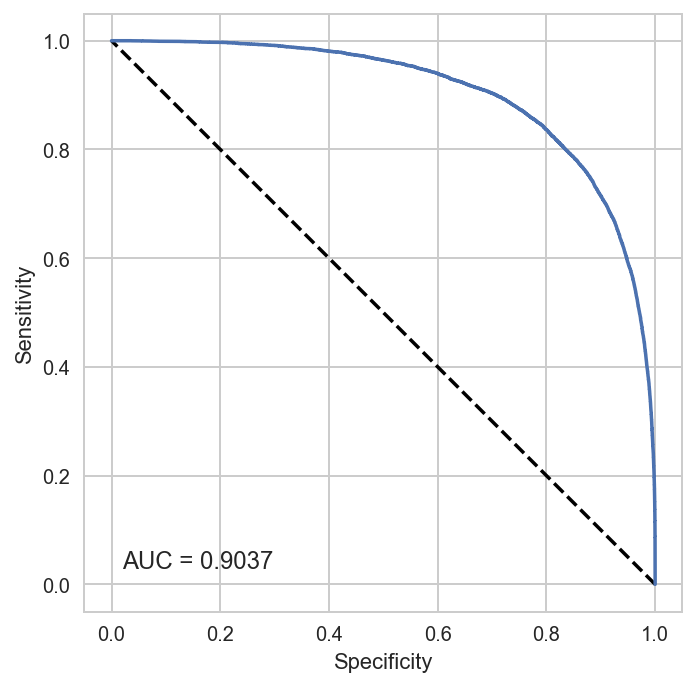

In [28]:
plotROC(yTrue, yProb)
plt.show()

#### Cumulative gains
In many business problems, resources are limited, making only the most potential targets are visited. So it is really important for the model to cover a high ratio of positive instances only by visiting a small part of the dataset, and this is where Cumulative Gains is used.

Cumulative Gains shows the overall positive percentage *gained* by targeting the top fraction of all observations. A popular method for determining the fractions of observations is *deciles* (10-quantiles). The diagonal in the chart represents the *baseline* model, which targets observations at random. A good model should have a high gain value at the very first deciles.

In [31]:
def plotCumulativeGains(yTrue, yProb, ax=None):
    dfProb = pd.DataFrame({'yTrue': yTrue, 'yProb': yProb})
    dfProb = dfProb.sort_values('yProb', ascending=False)
    n = dfProb.shape[0]
    nPositive = dfProb[dfProb.yTrue == 1].shape[0]
    
    deciles = np.linspace(0, 1, 11)
    gains = []
    
    for decile in deciles:
        nVisit = int(n * decile)
        dfGain = dfProb.head(nVisit)
        nGainPositive = dfGain[dfGain.yTrue == 1].shape[0]
        gain = nGainPositive / nPositive
        gains.append(gain)
    
    if ax is None:
        ax = plt.gca()
    ax.plot([0, 1], [0, 1], color='k', linestyle='--')
    ax.plot(deciles, gains, marker='o')
    ax.legend(['Baseline', 'Gains'], loc='best')
    ax.set_xlabel('Deciles')
    ax.set_ylabel('Gains')
    ax.axis('scaled')
    return ax

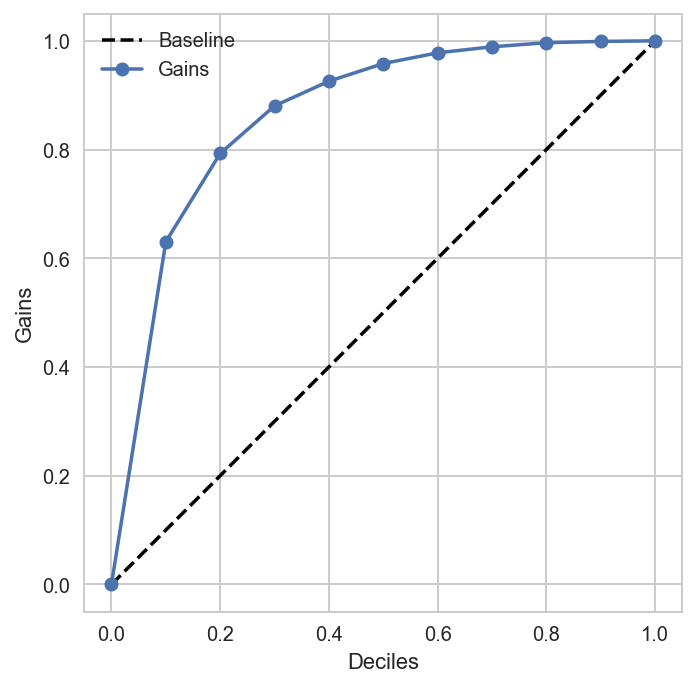

In [30]:
plotCumulativeGains(yTrue, yProb)
plt.show()

#### Lift curve
Besides Cumulative Gains, Lift Curve is also a powerful tool being widely used in marketing campaigns. It helps analyze the overall positive percentage in each bin, compared to bin size. Notice that bin size represents the expected percent of positive instances if targeted randomly. For example, assume there is a total of 70 positive instances and the bin size is chosen of 10% (*deciles*), then each bin is expected to contain $70\cdot 10\%=7$ positive instances.

The Lift Curve for an ideal model should have very high values at first, then drop significantly to the point that lift values are below the *baseline*. This proves that the vast majority of positive instances are in first bins.

In [34]:
def plotLiftCurve(yTrue, yProb, ax=None):
    bin_size = 0.01
    dfProb = pd.DataFrame({'yTrue': yTrue, 'yProb': yProb})
    dfProb = dfProb.sort_values('yProb', ascending=False)
    n = dfProb.shape[0]
    nVisit = int(n * bin_size)
    nPositive = dfProb[dfProb.yTrue == 1].shape[0]
    
    deciles = np.arange(1, 0, - bin_size)[::-1]
    lifts = []
    
    for decile in deciles:
        nTop = int(n * decile)
        dfGain = dfProb.head(nTop).tail(nVisit)
        nGainPositive = dfGain[dfGain.yTrue == 1].shape[0]
        lift = nGainPositive / nPositive / bin_size
        lifts.append(lift)
    
    if ax is None:
        ax = plt.gca()
    ax.plot([0, 1], [1, 1], color='k', linestyle='--')
    ax.plot(deciles, lifts)
    ax.set_xlabel('Deciles')
    ax.set_ylabel('Lift')
    return ax

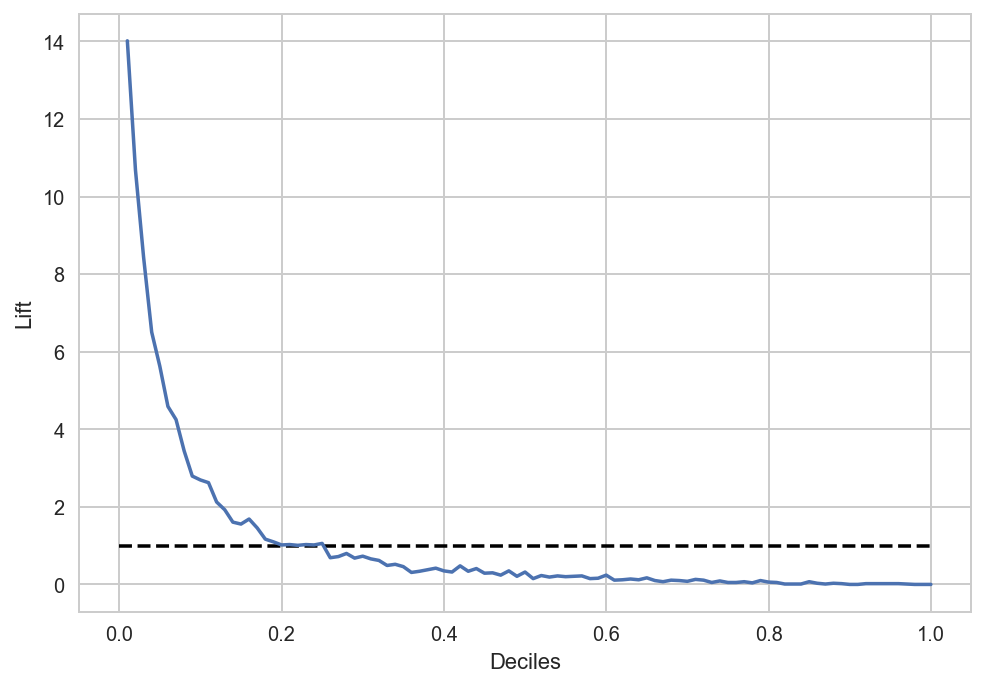

In [33]:
plotLiftCurve(yTrue, yProb)
plt.show()

### 2.3. Regression metrics
Let $\mathbf{y}=(y_1,y_2,\dots,y_N)$ is the vector of true data labels and $\hat{\mathbf{y}}=(\hat{y}_1,\hat{y}_2,\dots,\hat{y}_N)$ is the vector of predicted values.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [63]:
df = pd.read_csv('../data/boston.csv')
x = df.copy()
y = x.pop('price')

In [64]:
algo = LinearRegression()
model = algo.fit(x, y)

yTrue = y.copy()
yPred = model.predict(x)

#### R-squared
[Coefficient of Determination], denoted $R^2$ $(R^2 \leq 1)$, evaluates the scatter of data point around the fitted regression function. It is calculated using $\text{SSE}$ (sum of squared errors) and $\text{SST}$ (total sum of squares).

$$R^2=1-\dfrac{\text{SSE}}{\text{SST}}$$

Look closely at $\text{SSE}$ and $\text{SST}$, if we divide both of them by $N$, then the ratio between them is the ratio between (1) the error of our Machine Learning model and (2) the error made by a naive model using mean as prediction.

$$\text{SSE}=\sum_{n=1}^{N}(y_n-\hat{y}_n)^2;\quad
\text{SST}=\sum_{n=1}^{N}(y_n-\bar{y})^2$$

[Coefficient of Determination]: https://en.wikipedia.org/wiki/Coefficient_of_determination

In [65]:
r2_score(yTrue, yPred)

0.7406426641094095

In [66]:
# r2 is also the default score
model.score(x, y)

0.7406426641094095

#### Mean Absolute Error
MAE is simply the average distance between the real and the predicted values. The absolute value is taken to ensure they do not cancel each other out. MAE does not fall into any certain range, it itself cannot tell if the model is good enough, you can only use MAE to compare the performance of different models.

$${\mbox{MAE}}={\frac{1}{N}}\sum_{n=1}^{N}|y_n-\hat{y}_n|$$

In [67]:
mean_absolute_error(yTrue, yPred)

3.2708628109003164

#### Mean Squared Error
MSE is quite similar to MAE, however MSE gives higher penalization to big error. In real world problems, RMSE (Root Mean Squared Error) is used more commonly since it brings MSE back to the same unit with MAE.

$$\mbox{MSE} = \mbox{RMSE}^2 = {\frac{1}{N}} \sum_{n=1}^{N}(y_n-\hat{y}_n)^{2}$$

In [69]:
# mse
mean_squared_error(yTrue, yPred)

21.894831181729202

In [70]:
# rmse
mean_squared_error(yTrue, yPred, squared=False)

4.679191295697281